* `Import Libraries`

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib


# sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
import xgboost as xgb

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

* `Read the Dataset`

In [17]:
FILE_PATH = os.path.join(os.getcwd(), '..', 'dataset.csv')
df = pd.read_csv(FILE_PATH)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [19]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True) #inplace=overwrite data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [21]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [22]:
# stats #to know outliers and nans
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [23]:
# stats
df.describe(include='object')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


-----

* `EDA`

In [24]:
# Geography
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [25]:
# Gender
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [26]:
# For target (Exited)
df['Exited'].value_counts(normalize=True) #normalize=propability

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [27]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

---

* `Data Viz &  Handling Outliers`

* `Univariate Viz`

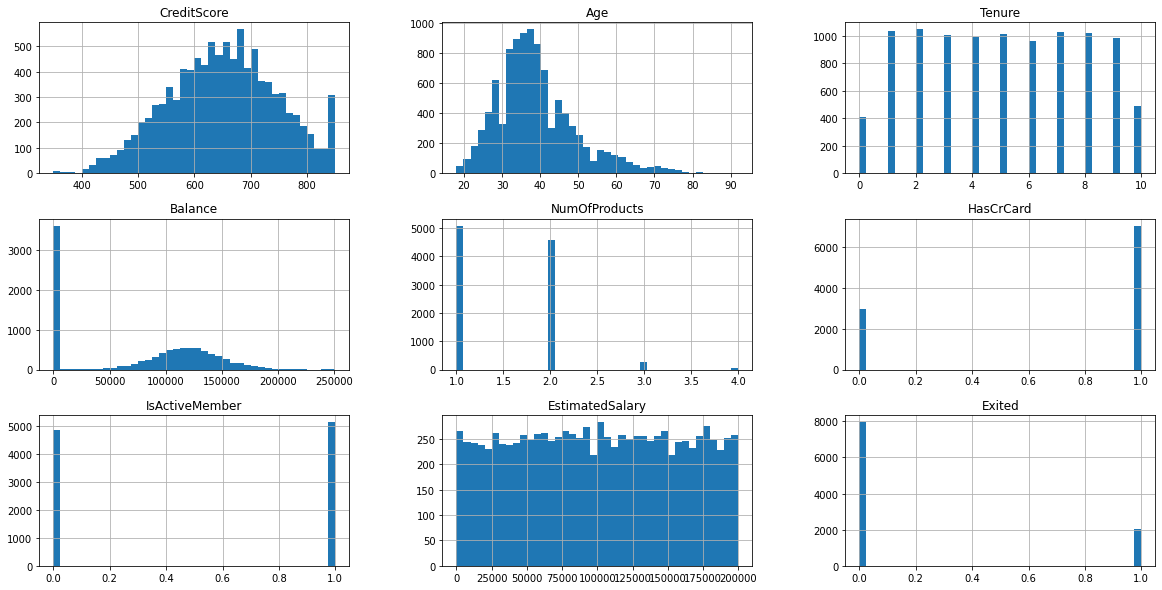

In [28]:
# Numerical
df.hist(bins=40, figsize=(20, 10))
plt.show()

In [29]:
# Handle Outliers
df.drop(index=df[df['Age'] > 80].index.tolist(), axis=0, inplace=True)

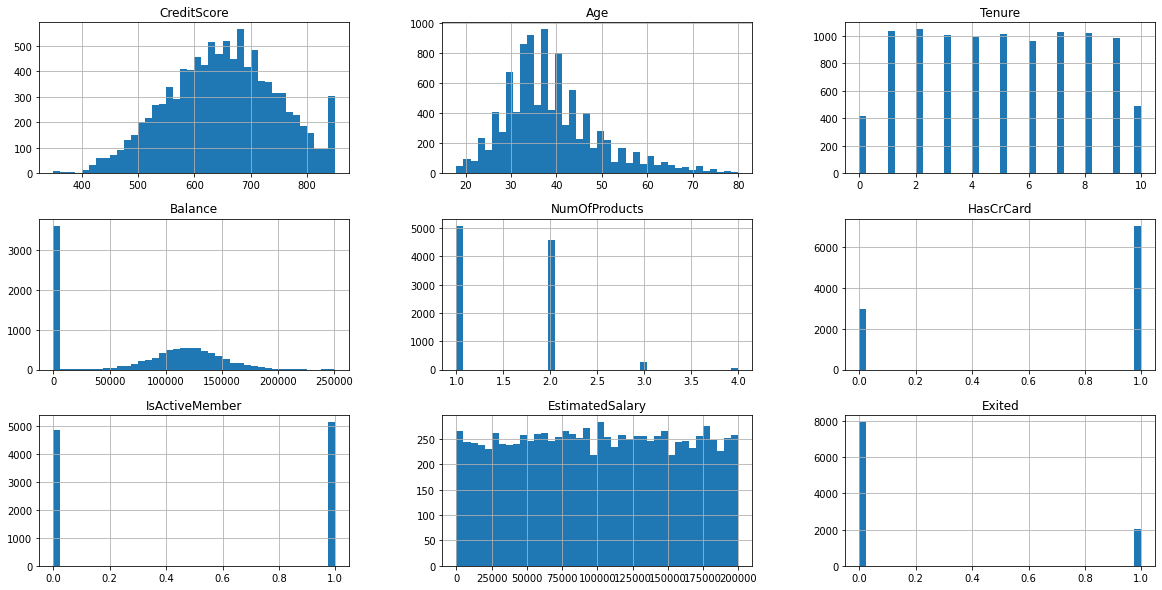

In [30]:
# Numerical
df.hist(bins=40, figsize=(20, 10))
plt.show()

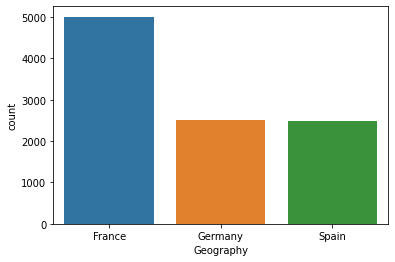

In [31]:
# countplot
sns.countplot(data=df, x='Geography', order=df['Geography'].value_counts(ascending=False).index.tolist())
plt.show()

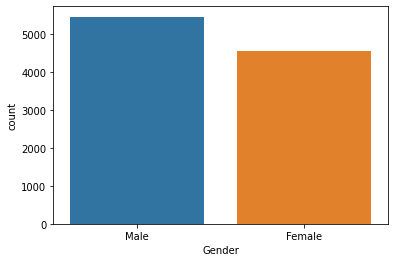

In [32]:
## counplot for Gender
sns.countplot(data=df, x='Gender', order=df['Gender'].value_counts().index.tolist())  ## title, xlabel, ylabel
plt.show()

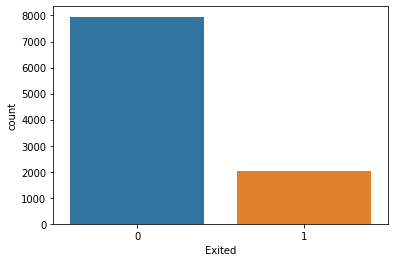

In [33]:
## counplot for Exited
sns.countplot(data=df, x='Exited', order=df['Exited'].value_counts().index.tolist())  ## title, xlabel, ylabel
plt.show()

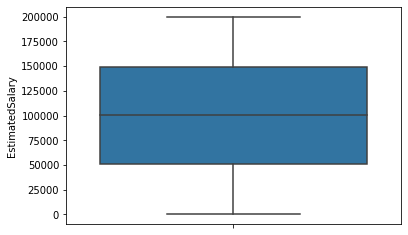

In [34]:
# Boxplot
sns.boxplot(data=df, y='EstimatedSalary')
plt.show()

* `Bivariate Viz`

In [35]:
# Average Salary per Gender
df[['Gender', 'EstimatedSalary']].groupby(by='Gender')['EstimatedSalary'].mean()

Gender
Female    100575.998277
Male       99671.901194
Name: EstimatedSalary, dtype: float64

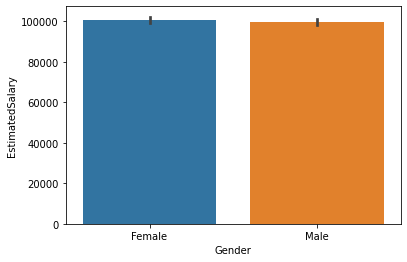

In [36]:
# Average Salary per Gender
sns.barplot(data=df, x='Gender', y='EstimatedSalary', estimator='mean')
plt.show()

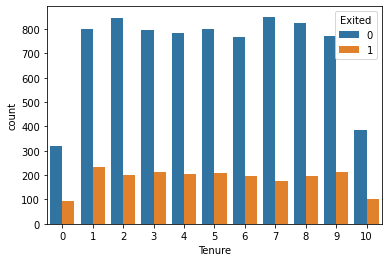

In [37]:
# Realation between Tenure and Exited
sns.countplot(data=df, x='Tenure', hue='Exited')
plt.show()

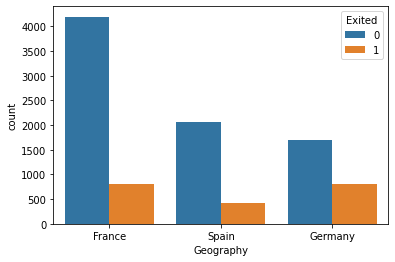

In [38]:
## Geography with Exited
sns.countplot(data=df, x='Geography', hue='Exited')  ## labels, titles
plt.show()
# germany data is small -- not very indicator 

----

* `Split Dataset`

In [39]:
# Split to X & y
X = df.drop(columns=['Exited'], axis=1)
y = df['Exited']

# Split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, stratify=y, random_state=45) #random_state same plitting each run

print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*10)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)

X_train.shape 	 (7990, 10)
y_train.shape 	 (7990,)
******************************
X_test.shape 	 (1998, 10)
y_test.shape 	 (1998,)


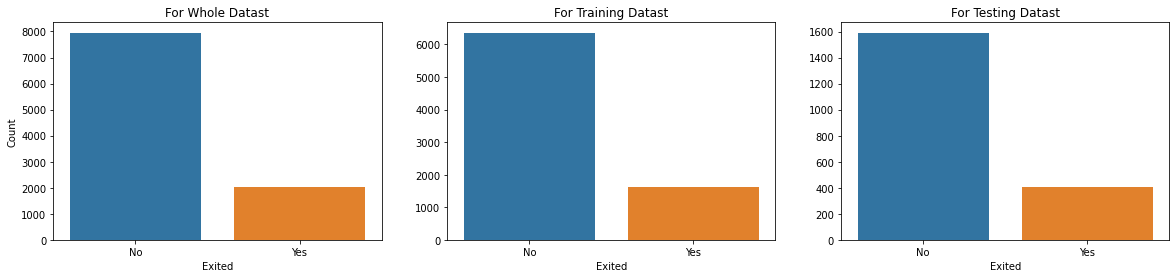

In [40]:
## plottting to check
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

## Whole dataset
plt.sca(ax[0])
sns.countplot(x=y)
plt.title('For Whole Datast')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

## train
plt.sca(ax[1])
sns.countplot(x=y_train)
plt.title('For Training Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

## test
plt.sca(ax[2])
sns.countplot(x=y_test)
plt.title('For Testing Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

----

* `Data Preprocessing & Pipeline`

In [41]:
# Slice lists
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary'] #numerical
categ_cols = ['Geography', 'Gender'] #obj
ready_cols = list(set(X_train.columns.tolist()) - set(num_cols) - set(categ_cols)) #rest

In [43]:
# Pipeline

# Numerical: num_cols -> Impute using median, and Standardization
# Categorical: categ_cols -> Impute most_frequent, and OHE
# Ready: ready_cols -> Impute most_frequent


num_pipeline = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler()),
        ])

categ_pipeline = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ohe', OneHotEncoder(drop='first', sparse=False)) # or use ordinary
        ])

ready_pipeline = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent'))
        ])


# Combine all
all_pipeline = ColumnTransformer(transformers=[
        ('numerical', num_pipeline, num_cols),
        ('categorical', categ_pipeline, categ_cols),
        ('ready', ready_pipeline, ready_cols)
    ])

# fit & transform
X_train_final = all_pipeline.fit_transform(X_train)
X_test_final = all_pipeline.transform(X_test)

/home/mariam/.local/lib/python3.8/site-packages/sklearn/impute/_base.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [45]:
print('X_train_final.shape \t', X_train_final.shape)
print('y_train.shape \t', y_train.shape)
print('***'*10)
print('X_test_final.shape \t', X_test_final.shape)
print('y_test.shape \t', y_test.shape)

X_train_final.shape 	 (7990, 11)
y_train.shape 	 (7990,)
******************************
X_test_final.shape 	 (1998, 11)
y_test.shape 	 (1998,)


In [46]:
# Create a folder
ARTIFACT_FOLDER_PATH = os.path.join(os.getcwd(), '..', 'artifacts')
os.makedirs(ARTIFACT_FOLDER_PATH, exist_ok=True)

In [47]:
# Dump pipeline
joblib.dump(all_pipeline, os.path.join(ARTIFACT_FOLDER_PATH, 'all_pipeline.pkl'))

['/home/mariam/depi/labs/01 Churn Full project/notebooks/../artifacts/all_pipeline.pkl']

---

* `Dealing with imbalanced Target`

In [48]:
# 1. Don't take care of imbalanced target

# 2. prepare class_weights for solving imbalance dataset
vals_count = 1 - (np.bincount(y_train) / len(y_train))
vals_count = vals_count / np.sum(vals_count) #normalization
dict_weight = {}
for i in range(2):
    dict_weight[i] = vals_count[i]

dict_weight

{0: 0.20387984981226537, 1: 0.7961201501877346}

In [49]:
# 3. Over Sampling
over = SMOTE(sampling_strategy=0.7) #make min 70% maj # on num data only so must pipeline
X_train_resampled, y_train_resampled = over.fit_resample(X_train_final, y_train)

----

* `Building Models`
> Evaluate using f1_score

`1. Logistic Regression`

In [50]:
# 1. Using logisit -- without considering the imabalancing data
log_clf = LogisticRegression(C=1.5)  
log_clf.fit(X_train_final, y_train)

y_pred_train_log = log_clf.predict(X_train_final)
y_pred_test_log = log_clf.predict(X_test_final)

score_train_log = f1_score(y_train, y_pred_train_log)
score_test_log = f1_score(y_test, y_pred_test_log)

print(f'The f1_score using Logistic model for Training Dataset is {score_train_log*100:.3f} %')
print(f'The f1_score using Logistic model for Testing Dataset is {score_test_log*100:.3f} %')

The f1_score using Logistic model for Training Dataset is 30.965 %
The f1_score using Logistic model for Testing Dataset is 37.500 %


In [51]:
## 2. Using logisit -- with considering the imabalancing data using class_weights
log_clf = LogisticRegression(C=1.5, class_weight=dict_weight)  
log_clf.fit(X_train_final, y_train)

y_pred_train_log = log_clf.predict(X_train_final)
y_pred_test_log = log_clf.predict(X_test_final)

score_train_log = f1_score(y_train, y_pred_train_log)
score_test_log = f1_score(y_test, y_pred_test_log)

print(f'The f1_score using Logistic model for Training Dataset with class_weigths is {score_train_log*100:.3f}')
print(f'The f1_score using Logistic model for Testing Dataset with class_weigths is {score_test_log*100:.3f}')

The f1_score using Logistic model for Training Dataset with class_weigths is 49.814
The f1_score using Logistic model for Testing Dataset with class_weigths is 49.915


In [52]:
## 3. Using logisit -- with considering the imabalancing data using oversampled data (SMOTE)
log_clf = LogisticRegression(C=1.5)  
log_clf.fit(X_train_resampled, y_train_resampled)

y_pred_train_log = log_clf.predict(X_train_final)
y_pred_test_log = log_clf.predict(X_test_final)

score_train_log = f1_score(y_train, y_pred_train_log)
score_test_log = f1_score(y_test, y_pred_test_log)


print(f'The f1_score using Logistic model for Training Dataset with SMOTE is {score_train_log*100:.3f}')
print(f'The f1_score using Logistic model for Testing Dataset with SMOTE is {score_test_log*100:.3f}')

The f1_score using Logistic model for Training Dataset with SMOTE is 49.538
The f1_score using Logistic model for Testing Dataset with SMOTE is 50.524


In [53]:
# dump locally
joblib.dump(log_clf, os.path.join(ARTIFACT_FOLDER_PATH, 'logisitic.pkl'))

['/home/mariam/depi/labs/01 Churn Full project/notebooks/../artifacts/logisitic.pkl']

* `2. RandomForest`

In [54]:
## Using RF -- With class_weights
forest_clf = RandomForestClassifier(n_estimators=150, 
                                    max_depth=5, 
                                    random_state=45, 
                                    max_samples=0.8, class_weight=dict_weight)
forest_clf.fit(X_train_final, y_train)


## Predict and evaluate
y_pred_train_forest = forest_clf.predict(X_train_final)
y_pred_test_foerst = forest_clf.predict(X_test_final)

## Using f1_score
score_train_forest = f1_score(y_train, y_pred_train_forest)
score_test_forest = f1_score(y_test, y_pred_test_foerst)


print(f'The f1_score using RF model for Training Dataset with class_weights is {score_train_forest*100:.3f}')
print(f'The f1_score using RF model for Testing Dataset with class_weights is {score_test_forest*100:.3f}')

The f1_score using RF model for Training Dataset with class_weights is 60.000
The f1_score using RF model for Testing Dataset with class_weights is 58.218


In [55]:
## Using RF -- With SMOTE
forest_clf = RandomForestClassifier(n_estimators=150, 
                                    max_depth=5, 
                                    random_state=45, 
                                    max_samples=0.8)
forest_clf.fit(X_train_resampled, y_train_resampled)


## Predict and evaluate
y_pred_train_forest = forest_clf.predict(X_train_final)
y_pred_test_foerst = forest_clf.predict(X_test_final)

## Using f1_score
score_train_forest = f1_score(y_train, y_pred_train_forest)
score_test_forest = f1_score(y_test, y_pred_test_foerst)

print(f'The f1_score using RF model for Training Dataset with SMOTE is {score_train_forest*100:.3f}')
print(f'The f1_score using RF model for Testing Dataset with SMOTE is {score_test_forest*100:.3f}')

The f1_score using RF model for Training Dataset with SMOTE is 61.831
The f1_score using RF model for Testing Dataset with SMOTE is 60.207


In [56]:
# dump locally
joblib.dump(forest_clf, os.path.join(ARTIFACT_FOLDER_PATH, 'forest_smote.pkl'))

['/home/mariam/depi/labs/01 Churn Full project/notebooks/../artifacts/forest_smote.pkl']

* `RF Tuning`

In [57]:
forest_clf = RandomForestClassifier(n_estimators=150, 
                                    max_depth=5, 
                                    random_state=45, 
                                    max_samples=0.8, class_weight=dict_weight)

params_best = {
    'n_estimators': np.arange(50, 470, 100),
    'max_depth': np.arange(2, 10, 2)
}

grid_forest = GridSearchCV(estimator=forest_clf, param_grid=params_best, cv=5, scoring='f1', verbose=4)
grid_forest.fit(X_train_final, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ......max_depth=2, n_estimators=50;, score=0.533 total time=   1.0s
[CV 2/5] END ......max_depth=2, n_estimators=50;, score=0.547 total time=   0.8s
[CV 3/5] END ......max_depth=2, n_estimators=50;, score=0.536 total time=   0.8s
[CV 4/5] END ......max_depth=2, n_estimators=50;, score=0.553 total time=   0.7s
[CV 5/5] END ......max_depth=2, n_estimators=50;, score=0.574 total time=   0.6s
[CV 1/5] END .....max_depth=2, n_estimators=150;, score=0.526 total time=   1.9s
[CV 2/5] END .....max_depth=2, n_estimators=150;, score=0.538 total time=   2.0s
[CV 3/5] END .....max_depth=2, n_estimators=150;, score=0.533 total time=   1.9s
[CV 4/5] END .....max_depth=2, n_estimators=150;, score=0.554 total time=   1.7s
[CV 5/5] END .....max_depth=2, n_estimators=150;, score=0.578 total time=   2.0s
[CV 1/5] END .....max_depth=2, n_estimators=250;, score=0.524 total time=   3.1s
[CV 2/5] END .....max_depth=2, n_estimators=250

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.20387984981226537,
                                                            1: 0.7961201501877346},
                                              max_depth=5, max_samples=0.8,
                                              n_estimators=150,
                                              random_state=45),
             param_grid={'max_depth': array([2, 4, 6, 8]),
                         'n_estimators': array([ 50, 150, 250, 350, 450])},
             scoring='f1', verbose=4)

In [58]:
grid_forest.best_score_

0.6139984888726827

In [59]:
grid_forest.best_params_

{'max_depth': 8, 'n_estimators': 450}

In [60]:
forest_tuned = grid_forest.best_estimator_
forest_tuned.fit(X_train_final, y_train)

## Predict and evaluate
y_pred_train_forest_tuned = forest_tuned.predict(X_train_final)
y_pred_test_foerst_tuned = forest_tuned.predict(X_test_final)

## Using f1_score
score_train_forest_tuned = f1_score(y_train, y_pred_train_forest_tuned)
score_test_forest_tuned = f1_score(y_test, y_pred_test_foerst_tuned)

print(f'The f1_score using tuned RF model for Training Dataset with class_weigths is {score_train_forest_tuned*100:.3f}')
print(f'The f1_score using tuned RF model for Testing Dataset with class_weigths is {score_test_forest_tuned*100:.3f}')

The f1_score using tuned RF model for Training Dataset with class_weigths is 68.368
The f1_score using tuned RF model for Testing Dataset with class_weigths is 61.386


In [61]:
# dump locally
joblib.dump(forest_tuned, os.path.join(ARTIFACT_FOLDER_PATH, 'forest_tuned.pkl'))

['/home/mariam/depi/labs/01 Churn Full project/notebooks/../artifacts/forest_tuned.pkl']

-----

* `3. KNN`

In [62]:
## Using knn with SMOTE
knn_clf = KNeighborsClassifier(n_neighbors=15, p=1, metric='minkowski')
knn_clf.fit(X_train_resampled, y_train_resampled)

## Predict and evaluate
y_pred_train_knn = knn_clf.predict(X_train_final)
y_pred_test_knn = knn_clf.predict(X_test_final)

## Using f1_score
score_train_knn = f1_score(y_train, y_pred_train_knn)
score_test_knn = f1_score(y_test, y_pred_test_knn)

print(f'The f1_score using KNN model for Training Dataset with SMOTE is {score_train_knn*100:.3f}')
print(f'The f1_score using KNN model for Testing Dataset with SMOTE is {score_test_knn*100:.3f}')

/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The f1_score using KNN model for Training Dataset with SMOTE is 66.628
The f1_score using KNN model for Testing Dataset with SMOTE is 53.349


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [63]:
## Tuning KNN using GridSearchCV with SMOTE
knn_clf = KNeighborsClassifier(n_neighbors=15, p=1, metric='minkowski')
params_best_knn = {
    'n_neighbors': np.arange(2, 50, 2),
    'p': [1, 2, 3, 4]
}

random_search = RandomizedSearchCV(estimator=knn_clf, 
                                   param_distributions=params_best_knn, 
                                   cv=5, n_iter=10, scoring='f1', verbose=4)
random_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5] END ...............n_neighbors=24, p=1;, score=0.685 total time=   0.5s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5] END ...............n_neighbors=24, p=1;, score=0.702 total time=   0.4s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5] END ...............n_neighbors=24, p=1;, score=0.770 total time=   0.4s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5] END ...............n_neighbors=24, p=1;, score=0.761 total time=   0.4s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5] END ...............n_neighbors=24, p=1;, score=0.762 total time=   0.4s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5] END ...............n_neighbors=22, p=4;, score=0.703 total time=   1.0s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5] END ...............n_neighbors=22, p=4;, score=0.716 total time=   1.0s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5] END ...............n_neighbors=22, p=4;, score=0.751 total time=   1.0s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5] END ...............n_neighbors=22, p=4;, score=0.738 total time=   1.0s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5] END ...............n_neighbors=22, p=4;, score=0.748 total time=   1.0s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5] END ...............n_neighbors=46, p=3;, score=0.678 total time=   1.3s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5] END ...............n_neighbors=46, p=3;, score=0.690 total time=   1.2s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5] END ...............n_neighbors=46, p=3;, score=0.722 total time=   1.3s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5] END ...............n_neighbors=46, p=3;, score=0.701 total time=   1.3s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5] END ...............n_neighbors=46, p=3;, score=0.713 total time=   1.3s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5] END ...............n_neighbors=38, p=1;, score=0.671 total time=   0.4s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5] END ...............n_neighbors=38, p=1;, score=0.700 total time=   0.5s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5] END ...............n_neighbors=38, p=1;, score=0.748 total time=   0.5s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5] END ...............n_neighbors=38, p=1;, score=0.721 total time=   0.4s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5] END ...............n_neighbors=38, p=1;, score=0.740 total time=   0.4s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5] END ...............n_neighbors=40, p=1;, score=0.669 total time=   0.4s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5] END ...............n_neighbors=40, p=1;, score=0.701 total time=   0.4s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5] END ...............n_neighbors=40, p=1;, score=0.746 total time=   0.4s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5] END ...............n_neighbors=40, p=1;, score=0.721 total time=   0.5s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5] END ...............n_neighbors=40, p=1;, score=0.742 total time=   0.5s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5] END ...............n_neighbors=42, p=4;, score=0.675 total time=   1.1s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5] END ...............n_neighbors=42, p=4;, score=0.685 total time=   1.2s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5] END ...............n_neighbors=42, p=4;, score=0.721 total time=   1.2s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5] END ...............n_neighbors=42, p=4;, score=0.697 total time=   1.1s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5] END ...............n_neighbors=42, p=4;, score=0.717 total time=   1.1s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5] END ...............n_neighbors=32, p=1;, score=0.684 total time=   0.4s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5] END ...............n_neighbors=32, p=1;, score=0.697 total time=   0.4s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5] END ...............n_neighbors=32, p=1;, score=0.752 total time=   0.4s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5] END ...............n_neighbors=32, p=1;, score=0.738 total time=   0.4s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5] END ...............n_neighbors=32, p=1;, score=0.744 total time=   0.4s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

[CV 1/5] END ...............n_neighbors=14, p=2;, score=0.726 total time=   0.3s
[CV 2/5] END ...............n_neighbors=14, p=2;, score=0.745 total time=   0.2s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5] END ...............n_neighbors=14, p=2;, score=0.778 total time=   0.2s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5] END ...............n_neighbors=14, p=2;, score=0.787 total time=   0.2s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5] END ...............n_neighbors=14, p=2;, score=0.791 total time=   0.2s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5] END ...............n_neighbors=18, p=2;, score=0.721 total time=   0.3s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5] END ...............n_neighbors=18, p=2;, score=0.724 total time=   0.3s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5] END ...............n_neighbors=18, p=2;, score=0.767 total time=   0.3s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5] END ...............n_neighbors=18, p=2;, score=0.767 total time=   0.3s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5] END ...............n_neighbors=18, p=2;, score=0.771 total time=   0.2s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5] END ...............n_neighbors=12, p=2;, score=0.727 total time=   0.2s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5] END ...............n_neighbors=12, p=2;, score=0.751 total time=   0.2s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5] END ...............n_neighbors=12, p=2;, score=0.802 total time=   0.2s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5] END ...............n_neighbors=12, p=2;, score=0.788 total time=   0.2s
[CV 5/5] END ...............n_neighbors=12, p=2;, score=0.803 total time=   0.2s


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=15, p=1),
                   param_distributions={'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48]),
                                        'p': [1, 2, 3, 4]},
                   scoring='f1', verbose=4)

In [64]:
random_search.best_score_

0.773945977712247

In [65]:
knn_tuned = random_search.best_estimator_
knn_tuned.fit(X_train_resampled, y_train_resampled)


## Predict and evaluate
y_pred_train_knn_tuned = knn_tuned.predict(X_train_final)
y_pred_test_knn_tuned = knn_tuned.predict(X_test_final)

## Using f1_score
score_train_knn_tuned = f1_score(y_train, y_pred_train_knn_tuned)
score_test_knn_tuned = f1_score(y_test, y_pred_test_knn_tuned)

print(f'The f1_score using tuned KNN model for Training Dataset with SMOTE is {score_train_knn_tuned*100:.3f}')
print(f'The f1_score using tuned KNN model for Testing Dataset with SMOTE is {score_test_knn_tuned*100:.3f}')

/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The f1_score using tuned KNN model for Training Dataset with SMOTE is 66.852
The f1_score using tuned KNN model for Testing Dataset with SMOTE is 51.620


/home/mariam/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [66]:
## Download if if you are satisfied ...
joblib.dump(knn_tuned, os.path.join(ARTIFACT_FOLDER_PATH, 'knn_tuned.pkl'))

['/home/mariam/depi/labs/01 Churn Full project/notebooks/../artifacts/knn_tuned.pkl']

---